- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [2]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

## Extraction de la variable catégorielle et des mesures


In [9]:
# Sélection de la variable catégorielle et conversion en format vertical
y = data1.iloc[:,0].values
y

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G

In [10]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data1.iloc[:,2:8].values
x

array([[27.82, 21.43, 44.87,  5.11,  1.77,  0.77],
       [28.49, 21.26, 43.89,  5.34,  1.79,  1.02],
       [28.35, 19.99, 45.78,  5.08,  1.63,  0.8 ],
       ...,
       [44.55, 11.01, 16.03,  2.43,  0.64, 25.98],
       [47.6 , 10.43, 15.18,  2.32,  0.56, 24.47],
       [46.84,  9.91, 15.5 ,  2.27,  0.57, 25.48]])

Les variables __quantitatives__ sont celles qui contiennent les mesures relatives aux nutriments présents dans les différentes _pizzas_ testées.

## ACP sur les données des pizzas

In [12]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [13]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-1.37181459,  1.25418127,  2.74984143,  1.9538938 ,  2.97668662,
        -1.22751105],
       [-1.30156227,  1.22771661,  2.64047481,  2.13533826,  3.03077869,
        -1.21362189],
       [-1.31624186,  1.03000998,  2.85139615,  1.93022714,  2.59804213,
        -1.22584435],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, -0.16032853, -0.07951534,
         0.1730719 ],
       [ 0.70220164, -0.45823828, -0.56352082, -0.24710631, -0.29588362,
         0.08918137],
       [ 0.62251244, -0.53918903, -0.52780927, -0.28655076, -0.26883759,
         0.14529358]])

In [14]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [15]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [19]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [18]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.232671         2.682641
1         4.291007         2.618213

In [33]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data1[['brand']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 brand
0         4.232671         2.682641     A
1         4.291007         2.618213     A

In [20]:
import matplotlib.pyplot as plt

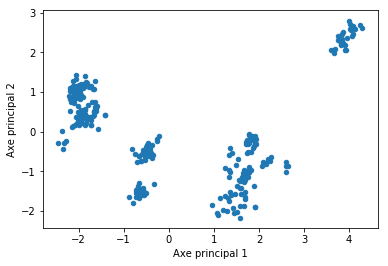

In [34]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

On retient __2 composantes principales__ .

In [36]:
# Attribut pour rechercher les élements uniques d'une liste
finaldf.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

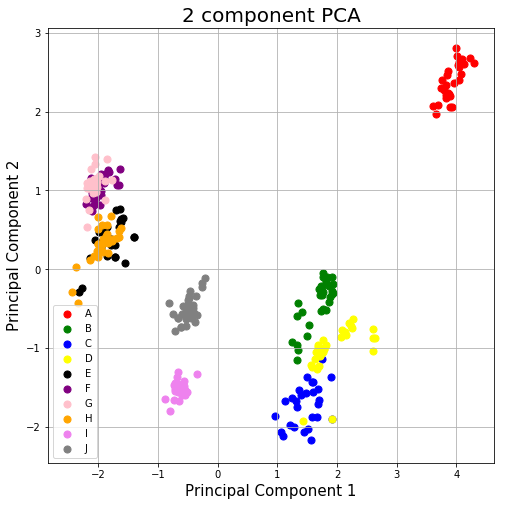

In [52]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C','D','E','F','G','H','I','J']
colors = ['red', 'green', 'blue','yellow','black','purple', 'pink', 'orange', 'violet', 'grey']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [42]:
# Création de la fonction Visu2D (df, target, colors, output_var)
def Visu2D (df, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(df.loc[indicesToKeep, 'Axe principal 1']
                   , df.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [53]:
#Paramètres d'entrées de la fonction Visu2D
targets = ['A', 'B', 'C','D','E','F','G','H','I','J']
colors = ['red', 'green', 'blue','yellow','black','purple', 'pink', 'orange', 'violet', 'grey']
output_var = data1['brand']

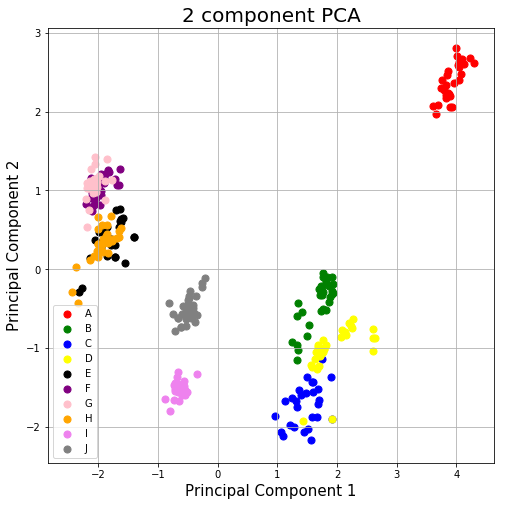

In [54]:
# Utilisation de la fonction Visu2D
Visu2D(finaldf, targets, colors, output_var)

In [46]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.66634275, 0.24778898])

On en déduit que les pizzas peuvent se regrouper en plusieurs groupes. En effet celles des marques B, C, D sont très corrélées par rapport à l'axe 1. De plus, celles des marques resp. F et G, et E et H sont fortement corrélées dans les deux axes. On peut en déduire qu'elles sont très similaires. En revanche, les pizzas de la marque A se détachent des autres marques en n'étant corrélée dans aucun des axes avec aucune autre pizza.

Le modèle semble à peu près représentatif.


## CAH

On effectue ensuite une CAH. Les données sont déjà centrées réduites.

In [55]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

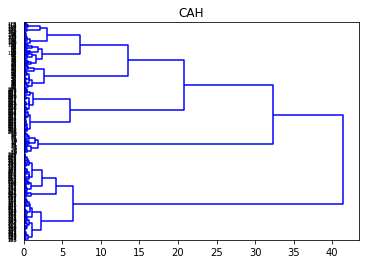

In [56]:
#générer la matrice des liens

Z = linkage(x,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=0)
plt.show()

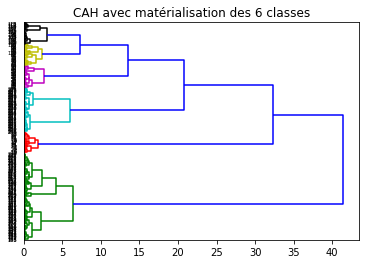

In [62]:
#matérialisation des 6 classes

plt.title('CAH avec matérialisation des 6 classes')
dendrogram(Z,labels=data1.index,orientation='right',color_threshold=7)
plt.show()

In [59]:
#découpage  pour voir les 6 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


In [65]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idg],groupes_cah[idg]))


      0
1   149
1   152
1   153
1   154
1   155
1   156
1   157
1   158
1   159
1   160
1   161
1   162
1   163
1   151
1   164
1   166
1   167
1   168
1   169
1   170
1   171
1   172
1   173
1   174
1   175
1   176
1   177
1   165
1   178
1   150
..  ...
6   105
6   106
6   107
6   108
6   109
6   115
6   111
6   112
6   113
6   114
6   104
6   116
6   110
6   103
6    96
6   101
6   100
6    99
6    98
6    97
6    94
6    93
6    92
6    91
6    90
6    89
6    88
6    87
6   102
6   117

[300 rows x 1 columns]


On constate donc que les 10 marques de pizzas peuvent être regourpées en 6 catégories. La classe 1 contient les pizzas de la marque F. 
La classe   __6__ les pizzas de la marque D .

## Méthoe K-Means

In [66]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=6)  # on choisit 6 grace à l'étude du dessus
kmeans.fit(x)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))



[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
      0
0   149
0   141
0   142
0   143
0   144
0   145
0   146
0   147
0   148
0   209
0   150
0   151
0   152
0   153
0   154
0   155
0   156
0   157
0   158
0   159
0   140
0   160
0   139
0   137
0   210
0   119
0   120
0   121
0   122
0   123
..  ...
5    57
5    30
5    56
5    55
5    54
5    53
5    52
5    51
5    50
5    49
5    48
5    47
5    46
5    45
5    29
5    59
5    4

In [67]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x),index = data1.index)
print(dist_data)

            0         1         2         3         4         5
0    6.496193  4.371361  6.086427  0.469310  5.335548  4.179757
1    6.536497  4.339656  6.090124  0.506129  5.338760  4.169993
2    6.262386  4.180948  5.857340  0.325571  5.157321  3.947304
3    5.957573  3.824567  5.482940  0.228159  4.793147  3.568642
4    5.978763  3.772800  5.490720  0.319768  4.733531  3.595990
5    6.016761  3.819467  5.507284  0.193576  4.811892  3.576185
6    5.817087  3.605896  5.310615  0.436759  4.561741  3.414755
7    6.299649  4.101512  5.853285  0.463077  5.106741  3.978241
8    6.331019  4.258955  5.926973  0.303979  5.229524  4.022224
9    6.370318  4.226859  5.967749  0.376415  5.191393  4.067819
10   6.294131  4.227514  5.921444  0.407576  5.164643  4.042203
11   6.352381  4.260334  5.982268  0.413627  5.223722  4.109507
12   6.061143  3.991275  5.656896  0.353679  4.952309  3.767627
13   5.928197  3.835259  5.451648  0.242785  4.826067  3.543712
14   5.964180  3.735343  5.459207  0.263

In [68]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0    0   1   2   3   4   5
row_0                         
1      120   0   0   0   0   0
2        0   0   0  29   0   0
3        0   0  61   0   0   0
4        0   0   0   0   0  31
5        0   0   0   0  29   0
6        0  30   0   0   0   0

Malgré quelques différences, il y a bien correspondance entre les groupes formés pour la CAH et dans la méthode des K-means. Il y a de fortes correspondances entre les groupes sans pour autant être en correspondance parfaite.

[0.54992698 0.57905295 0.62755429 0.6748042  0.67213504 0.58427032
 0.60011601 0.61878786 0.60690932 0.58779133 0.56685364 0.58517464
 0.54120194 0.53578825 0.48652305]


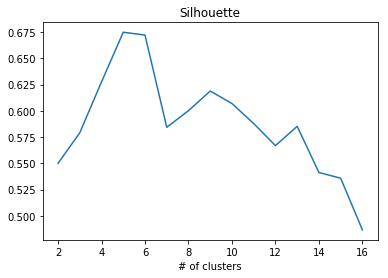

In [69]:
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x)
    res[k] = metrics.silhouette_score(x,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

Le nombre de groupe le plus adapté au sens de la metric "silhouette" semble être 6.

[ 381.11409187  484.3690527   759.63203754 1070.5750806  1118.55409646
 1216.7746459  1413.74743061 1492.07547637 1474.23008347 1426.0720665
 1409.70335578 1435.55860798 1424.09138771 1460.07687449 1414.57208743]


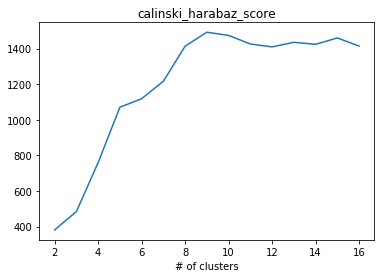

In [70]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x)
    res[k] = metrics.calinski_harabaz_score(x,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

En revanche, le nombre de groupe le plus adapté au sens de la metric "calinski_harabaz_score" est 9. Mais le but n'est pas de créer une classe par marque (et nous avons 10 marques).

### Interprétation des classes

In [71]:
#moyenne par variable

m = data1.mean()

#TSS

TSS = data1.shape[0]*data1.var(ddof=0)
print(TSS)

id        1.449618e+10
mois      2.728661e+04
prot      1.237902e+04
fat       2.408817e+04
ash       4.820472e+02
sodium    4.101229e+01
carb      9.719620e+04
cal       1.149483e+02
dtype: float64


In [72]:
#data.frame conditionnellement aux groupes

gb = data1.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)


0    120
1     30
2     61
3     29
4     29
5     31
dtype: int64


In [73]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


             id       mois       prot        fat       ash    sodium  \
0  20328.691667  32.447333   7.940333  15.343917  1.449167  0.442000   
1  19741.400000  47.471000  21.913667  21.950667  4.355000  0.729333   
2  23408.032787  50.103443  10.479180  14.772623  2.238033  0.553934   
3  20632.000000  29.966207  20.107241  43.446897  5.014483  1.656207   
4  19934.241379  49.560000  26.092414  19.025862  3.314138  0.467241   
5  19881.161290  51.307742  13.638710  27.620323  3.463548  0.984839   

        carb       cal  
0  42.816583  3.413833  
1   4.309667  3.025000  
2  22.420492  2.643443  
3   1.486897  4.773793  
4   2.011034  2.837241  
5   3.969677  3.190968  


In [74]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


id        5.234088e+08
mois      2.403567e+04
prot      1.224984e+04
fat       2.213731e+04
ash       4.659608e+02
sodium    3.963589e+01
carb      9.504240e+04
cal       9.943520e+01
dtype: float64


In [75]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

id        0.036107
mois      0.880859
prot      0.989565
fat       0.919012
ash       0.966629
sodium    0.966439
carb      0.977841
cal       0.865043
dtype: float64


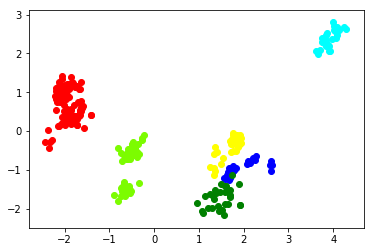

In [76]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(x)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua','green','yellow'],[0,1,2,3,4,5]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

#### problème:
le groupe en bleu clair écrase les autres données dans une petite partie du graphe.  
Il convient donc d'exclure ce groupe de données et de recommencer l'ACP dans un autre plan que ce plan factoriel.

In [87]:
#retirer des observations le groupe du k-means précédent
data1_subset = data1.iloc[kmeans.labels_!=1,2:9]

print(data1_subset.shape)
print(data1_subset)

(270, 7)
      mois   prot    fat   ash  sodium   carb   cal
0    27.82  21.43  44.87  5.11    1.77   0.77  4.93
1    28.49  21.26  43.89  5.34    1.79   1.02  4.84
2    28.35  19.99  45.78  5.08    1.63   0.80  4.95
3    30.55  20.15  43.13  4.79    1.61   1.38  4.74
4    30.49  21.28  41.65  4.82    1.64   1.76  4.67
5    31.14  20.23  42.31  4.92    1.65   1.40  4.67
6    31.21  20.97  41.34  4.71    1.58   1.77  4.63
7    28.76  21.41  41.60  5.28    1.75   2.95  4.72
8    28.22  20.48  45.10  5.02    1.71   1.18  4.93
9    27.72  21.19  45.29  5.16    1.66   0.64  4.95
10   27.35  21.20  45.59  4.94    1.65   0.92  4.98
11   26.98  21.20  45.03  5.15    1.67   1.64  4.97
12   28.70  20.00  45.12  4.93    1.56   1.25  4.91
13   30.91  19.65  42.45  4.81    1.65   2.81  4.72
14   30.91  20.77  42.03  4.90    1.61   1.39  4.67
15   30.83  17.88  44.33  5.26    1.76   1.70  4.77
16   32.73  20.06  39.74  5.24    1.69   2.23  4.47
17   34.58  17.53  40.87  5.05    1.61   1.97  4.46
18 

In [88]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [90]:
#centrer et réduire
data1_subset_cr = sc.fit_transform(data1_subset.values)
print(data1_subset_cr)

[[-1.26294008  1.48430082  2.64183067 ...  2.85518405 -1.3563956
   2.52832736]
 [-1.19444258  1.45628064  2.53756903 ...  2.90675615 -1.34235798
   2.38886906]
 [-1.20875549  1.24695334  2.73864504 ...  2.49417938 -1.35471109
   2.55931809]
 ...
 [ 0.4474526  -0.23317192 -0.42644034 ... -0.05863938  0.05915763
  -0.58624138]
 [ 0.75926955 -0.32877022 -0.51687135 ... -0.26492777 -0.02562957
  -0.83416725]
 [ 0.6815709  -0.41447903 -0.48282673 ... -0.23914172  0.0310824
  -0.75669041]]


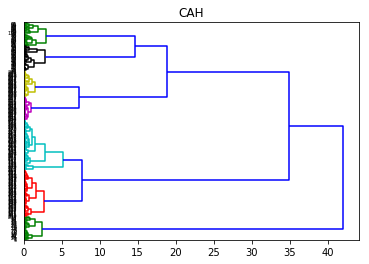

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [93]:
#générer la matrice des liens

Z_subset = linkage(data1_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=data1_subset.index,orientation='right',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

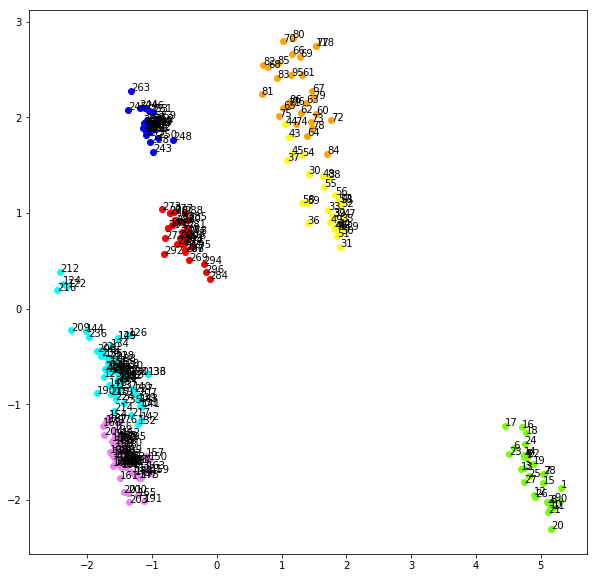

In [96]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(data1_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','violet','aqua','blue', 'red', 'yellow', 'orange'],[1,2,3,4,5,6,7]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(data1_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

#### Conclusion
Les pizzas sont en général dans le __même__ groupe qu'à la première analyse, bien que certaines aient changé de groupe.





# Partie 2

In [97]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [99]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

In [100]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


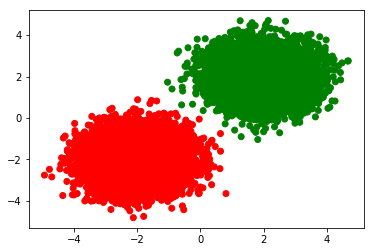

In [101]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [102]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [103]:
list(datas[0])+[labels[0]]

[-1.5631069651871252, -0.36833206078814484, 0.0]

In [104]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0      -1.5631069651871252  -0.36833206078814484     red
1      -3.4150553566418624   -2.8129531279019853     red
2      -3.0872689961489095    -2.387639441989889     red
3      -1.2644446259202413   -2.5191084605010756     red
4      -2.2767257276774413   -2.3048425835034254     red
5      -2.7886852146578054   -2.6278324493467577     red
6      -1.7735510213589132   -1.2804987718590566     red
7      -1.4961960175677083   -2.1369678351831114     red
8      -2.4151465447088483   -2.4986195965587803     red
9      0.05108722305827751   -1.0259669074320636     red
10      -3.104745891153866     -3.85866272026742     red
11     -1.3827376539195693   -1.7446075707811541     red
12      -2.722558524452975    -2.525557212291048     red
13       -2.29820978264449   -1.0771212489636934     red
14     -2.8863695267577523   -1.5636267538899506     red
15     -2.8214042646450723    -1.877872323703437     red
16     -1.5026312090748803    -2.019637715789057     red
17     -2.5100529573686954   -0.3643950180712485     red
18      -3.417995015627404   -2.3985457084423256     red
19      -2.179494339915368   -2.1047429982439736     red
20     -1.6862986041570158   -0.9649227946705781     red
21      -1.726020948856491    -1.391331568461226     red
22     -1.9602386099788758   -1.5637270557749523     red
23     -1.4864770689159383   -1.7711909162547133     red
24      -2.488011230326097   -1.4545673070505394     red
25       -2.17126227384394   -1.0065415534276942     red
26     -1.9403911064557324   -2.6218466625794505     red
27     -3.1545728446613994   -2.8342280550493557     red
28     -1.3111975595291396   -2.0643048416663077     red
29     -2.3481029416053367   -1.3525827734091518     red
...                    ...                   ...     ...
19970   1.7811976653172072     1.478807128425966   green
19971   1.3676064675965778     2.346933423990942   green
19972    2.029888882363812    2.2028693096776215   green
19973    3.206782694022663    0.9109235783825387   green
19974   1.9475317182825826    0.9782164925494099   green
19975    1.134798024540561    2.2555638373530744   green
19976   2.1184936064796136    1.1378381352869025   green
19977   1.6198898246050863    1.8301849036738989   green
19978     3.03023682341019    3.0868751469293625   green
19979    1.811738731054064    1.3222633475954804   green
19980   2.5946698437403644    1.4879471950036747   green
19981   0.7727836152488292      2.37080692344821   green
19982    1.010545767947266     2.653827960953964   green
19983   2.0882679376835402    2.2836457333103812   green
19984   3.0240629352264525    1.9417418677974958   green
19985    2.990837354217777    2.2497752305408345   green
19986   1.6201819872176484    0.6914189048961794   green
19987     1.41070654480982    1.9557060407873046   green
19988   2.0411609416382417     1.633388111515128   green
19989   1.4839425016342367    1.6556938817851228   green
19990   1.4041257807570986    2.0138423387027333   green
19991   0.9677767981873364    2.9361016373512028   green
19992   1.7860945228260652    2.2467688476657455   green
19993   3.2131303451387625    1.7388096408037321   green
19994   2.3123381991609286    1.4396978717191824   green
19995    1.996003596676096    2.9198327280815057   green
19996   1.1797860766115875     2.004170179865951   green
19997    2.396139209146888    1.1171609322579863   green
19998    1.667403299385877     3.036979429489672   green
19999   1.4977783995263447    2.2941789165250768   green

[20000 rows x 3 columns]

In [105]:
# model creation
model = tf.keras.models.Sequential()

In [106]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

In [107]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.84634656 0.15365341]]
Found :  0
Should be :  0.0


In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)
labels

array([0., 0., 0., ..., 1., 1., 1.])

### Utiliser ce modèle et comparer

In [7]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)